# Dashboard

Track improvement of database versions for several limited datasets.

In [1]:
import io, requests
import pandas as pd
from datetime import date
from htmldate import find_date
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Functions

### Check whether updates are needed

**Inputs**: 
- URL to the landing page for a csv file that we know has address data for government buildings
- date last pulled

**Output**:
- boolean indicating whether an update is needed

In [2]:
def needs_update(url, date_last_pulled):
    date_last_updated = find_date(url)
    return date_last_updated > date_last_pulled

### Get addresses

**Input**: URL to a csv file that we know has address data for government buildings

**Output**: list of addresses from the file

In [3]:
def get_addresses(url):
    s = requests.get(url).content
    df = pd.read_csv(io.StringIO(s.decode('utf-8')))

    address_col_names = []
    for x in df.columns:
        if 'address' in x.lower():
            address_col_names.append(x)

    for address_col_name in address_col_names:
        print(list(df[address_col_name]))

# Dashboard

### Check whether ground truth data needs to be pulled again

In [11]:
date_last_pulled = str(date.today())

for landing_url in [cdtfa_landing_url, dgs_landing_url, dds_landing_url]:
    print(needs_update(landing_url, date_last_pulled))

False
False
False


## Load ground truth data

From government open data sites

In [105]:
# CA Dept. of Tax and Fee Administration Offices
cdtfa_data_url = 'http://data-cdtfa.opendata.arcgis.com/datasets/6b7ab4e55a2d463db9e902c2496c6e37_0.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D'
cdtfa_landing_url = 'https://data.ca.gov/dataset/cdtfa-offices'

# CA Dept. of Developmental Services Regional Centers
dds_data_url = 'https://data.chhs.ca.gov/dataset/0e68b593-183d-41d0-80e0-7e828d99a22d/resource/369ea9be-077f-423d-b10d-09022e3fda9f/download/regional-center-information.csv'
dds_landing_url = 'https://data.ca.gov/dataset/regional-center-information'

# MI Secretary of State Branch Offices
misos_data_path = './ground_truth/MISOS_Branches.csv'

In [112]:
s = requests.get(cdtfa_data_url).content
df_cdtfa_gt = pd.read_csv(io.StringIO(s.decode('utf-8')))
print('total df length: %s' % str(len(df_cdtfa_gt)))
df_cdtfa_gt.head()

total df length: 26


,X,Y,OBJECTID,doid,city,address1,address2,state,zip,phone,fax,directions,comments,type,DISTRICT_OF_LOC,OfficeType
0,-1.324950e+07,4.216651e+06,1,1,Bakersfield,1800 30th St,Suite 380,CA,93301-1922,(661) 395-2880,(661) 395-2588,"https://www.google.com/maps/dir//1800+30th+St,...",Bakersfield,in,DFB,Bakersfield
1,-1.314243e+07,4.011057e+06,2,6,Cerritos,12750 Center Court Drive South,Ste. 400,CA,90703-8594,(562) 356-1102,(562) 402-8503,https://www.google.com/maps/dir//12750+Center+...,Cerritos,in,AA,Cerritos
2,-1.317931e+07,4.026731e+06,3,2,Culver City,5901 Green Valley Circle,Ste. 200,CA,90230-6948,(310) 342-1000,(310) 342-1061,https://www.google.com/maps/dir//5901+Green+Va...,Culver City,in,AS,Culver City
3,-1.286559e+07,3.867842e+06,4,3,El Centro,1550 West Main St.,,CA,92243-2832,(760) 352-3431,(760) 352-8149,https://www.google.com/maps/dir//1550+W+Main+S...,El Centro,in,FHA,El Centro
4,-1.358663e+07,4.618437e+06,5,32,Fairfield,2480 Hilborn Road,Suite 200,CA,94534,(707) 427-4800,(707) 427-4815,https://www.google.com/maps/dir//2480+Hilborn+...,Fairfield,in,JHF,Fairfield


In [113]:
s = requests.get(dds_data_url).content
df_dds_gt = pd.read_csv(io.StringIO(s.decode('utf-8')))
print('total df length: %s' % str(len(df_dds_gt)))
df_dds_gt.head()

total df length: 135


,Regional Center,Office,Address,Suite,City,State,Zip Code,Telephone,Website,County Served,Los Angeles Health District Served,Location 1
0,Far Northern Regional Center,Field,421 Chestnut Street,NaN,Mt. Shasta,CA,96067,(530) 222-4791,www.farnorthernrc.org,NaN,NaN,421 Chestnut Street\nMt. Shasta 96067\n(41.315...
1,North Bay Regional Center,Main,610 Airpark Road,NaN,Napa,CA,94558,(707) 256-1100,www.nbrc.net,Solano,NaN,"610 Airpark Road\nNapa 94558\n(38.218198, -122..."
2,San Andreas Regional Center,Main,300 Orchard City Drive,Ste. 170,Campbell,CA,95008,(408) 374-9960,www.sarc.org,Santa Clara,NaN,300 Orchard City Drive\nCampbell 95008\n(37.28...
3,Regional Center of Orange County,Mailing,P.O Box 22010,NaN,Santa Ana,CA,92702,(714) 796-5100,www.rcocdd.com,NaN,NaN,P.O Box 22010\nSanta Ana 92702\n
4,Inland Regional Center,Main,1365 South Waterman Avenue,NaN,San Bernardino,CA,92408,(909) 890-3000,www.inlandrc.org,San Bernardino,NaN,1365 South Waterman Avenue\nSan Bernardino 924...


In [114]:
df_misos_gt = pd.read_csv(misos_data_path)
print('total df length: %s' % str(len(df_misos_gt)))
df_misos_gt.head()

total df length: 131


,name,address
0,Adrian,"1040 S Winter Ste 2200, Adrian, MI 49221"
1,Albion,"308 S Superior St, Albion, MI 49224"
2,Allegan,"430 Western Ave, Allegan, MI 49010"
3,Alma,"1586 Wright Ave, Alma, MI 48801"
4,Alpena,"2666 US 23 South, Alpena, MI 49707"


# Precision and recall dashboards

In [3]:
def show_dashboard(name, precision_recall_path):

    precision_recall_df = pd.read_csv(precision_recall_path)
    precision = list(precision_recall_df.precision)
    recall = list(precision_recall_df.recall)
    version_indices = list(precision_recall_df.index)

    plt.figure(figsize=(10,4))
    plt.scatter(version_indices, precision, color='blue')
    plt.scatter(version_indices, recall, color='orange')

    handle1 = Line2D([0],[0], marker='o', markerfacecolor='blue',
                     color='w',markersize=8, label='precision')
    handle2 = Line2D([0],[0], marker='o', markerfacecolor='orange',
                     color='w', markersize=8, label='recall')
    plt.legend(handles=[handle1, handle2], loc='upper right')
    plt.xlabel('Database Version')
    plt.ylabel('Precision and Recall')
    xmax = 10
    plt.xticks(range(xmax+1))
    plt.xlim(-0.5, xmax+0.5)
    plt.ylim(-0.1, 1.1)
    plot_title = name
    plt.title(plot_title)
    plt.show()

## CA Dept. of Tax and Fees Administration Offices

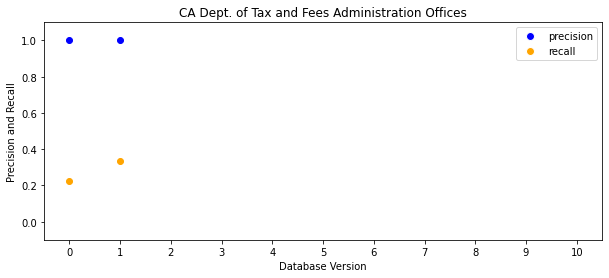

In [80]:
precision_recall_path = './precision_recall/CDTFA_precision_recall.csv'
name = 'CA Dept. of Tax and Fees Administration Offices'
show_dashboard(name, precision_recall_path)

#### Version notes:

v0
- yellow pages query = 'california+department+of+tax+and+fees+administration'
- yellow pages location = 'CA'

v1
- yellow pages query = 'department+of+tax+and+fees+administration'
- yellow pages location = 'CA'

## CA Dept. of Developmental Services Regional Centers

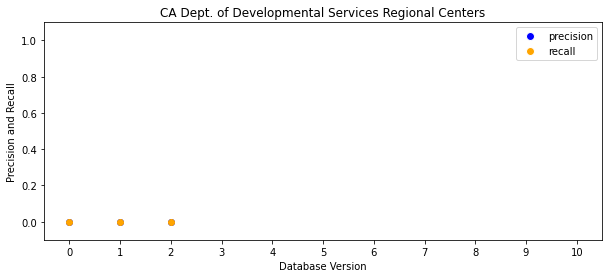

In [4]:
precision_recall_path = './precision_recall/CDDS_precision_recall.csv'
name = 'CA Dept. of Developmental Services Regional Centers'
show_dashboard(name, precision_recall_path)

#### Version notes:

v0
- yellow pages query = 'department+of+developmental+services+regional+centers'
- yellow pages location = 'CA'

v1
- yellow pages query = 'department+of+developmental+services'
- yellow pages location = 'CA'

v2
- yellow pages query = 'developmental+services'
- yellow pages location = 'CA'

I did cross-check the center listings from the CA Open Data portal (which is used as ground truth for precision and recal) with the center listings at https://www.dds.ca.gov/rc/listings/

## Michigan Secretary of State Offices

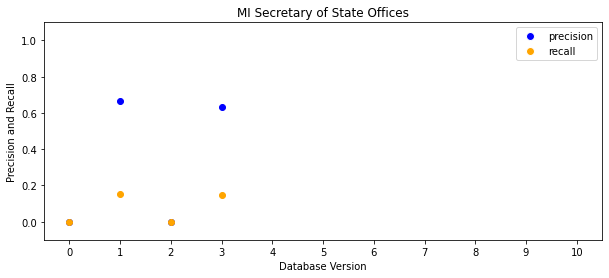

In [117]:
precision_recall_path = './precision_recall/MISOS_precision_recall.csv'
name = 'MI Secretary of State Offices'
show_dashboard(name, precision_recall_path)

#### Version notes:

v0
- yellow pages query = 'state+of+michigan+secretary+of+state'
- yellow pages location = 'MI'
- failed to process page

v1
- yellow pages query = 'state+of+michigan+secretary+of+state+office'
- yellow pages location = 'MI'

v3
- yellow pages query = 'state+of+michigan+secretary+of+state+office'
- yellow pages location = 'Ann+Arbor%2C+MI'
- failed to process page

v4
- yellow pages query = 'state+of+michigan+secretary+of+state'
- yellow pages location = 'Ann+Arbor%2C+MI'

# Sandbox

Collect raw data from https://michigansos.state.mi.us/servicelocator/mcgi.aspx# into csv


In [104]:
df = pd.read_csv('./ground_truth/mi_sos_raw.csv', header=None)
names, ad1, ad2 = [], [], []
for i in range(len(df)):
    if i % 3 != 0:
        continue
    names.append(df.iloc[i][0])
    ad1.append(df.iloc[i+1][0])
    ad2.append(df.iloc[i+2][0])
ad = []
for x, y in zip(ad1, ad2):
    ad.append(x+', '+y)